In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from collections import Counter
from pmareport import pmareport
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
clinic = pmareport.Clinic()
df = clinic.df

In [3]:
df.head()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,1900-01-01 07:55:00,-1 days +23:56:00,12,15,1,0,16,0,0
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,1900-01-01 08:15:00,00:00:00,3,35,1,0,16,1,0
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,1900-01-01 08:26:00,-1 days +23:56:00,16,35,1,0,16,2,0
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,1900-01-01 09:03:00,00:03:00,8,28,1,0,16,3,0
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,1900-01-01 09:56:00,-1 days +23:56:00,4,16,1,0,16,4,1


In [221]:
df['sex'] = df.SEX.apply(lambda x : 0 if x == 'M' else 1)

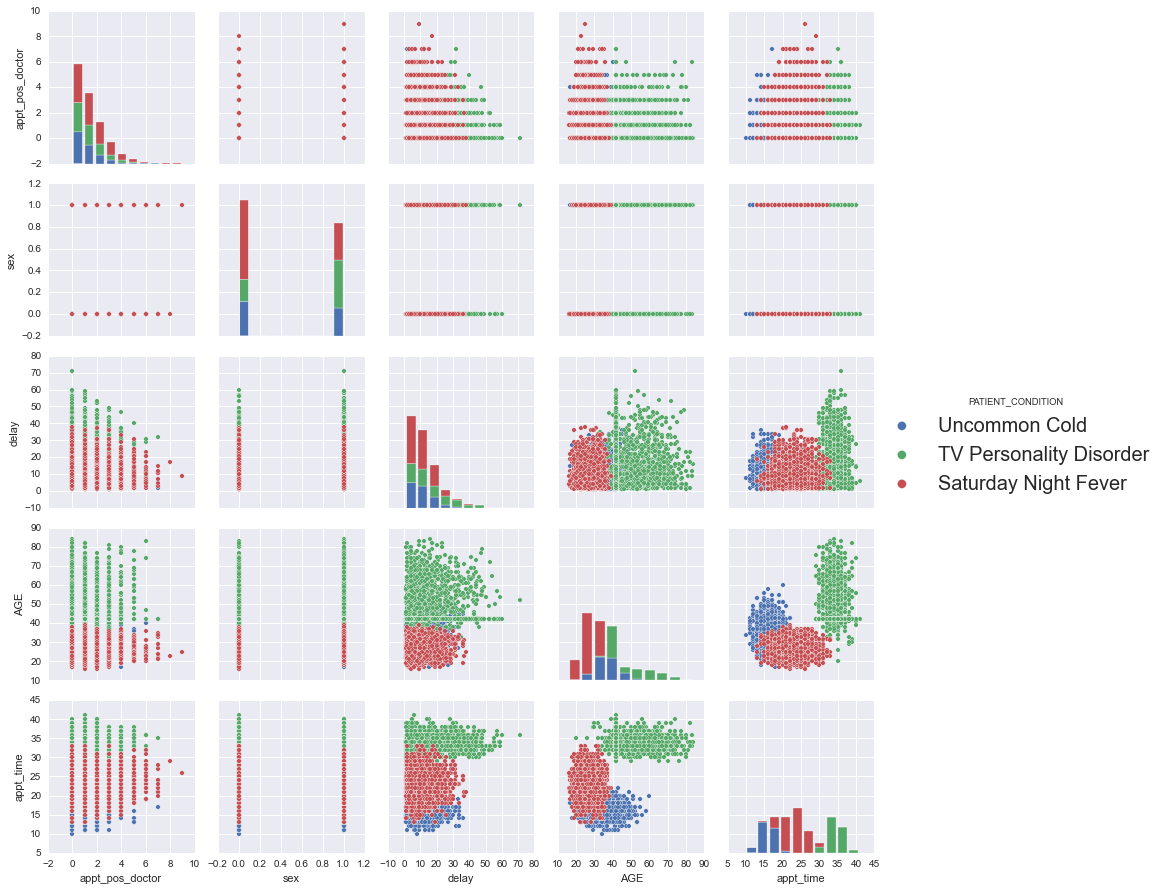

In [223]:
clinic.make_pairplot(pair_vars=['appt_pos_doctor', 'sex', 'delay', 'AGE', 'appt_time'], hue='PATIENT_CONDITION')

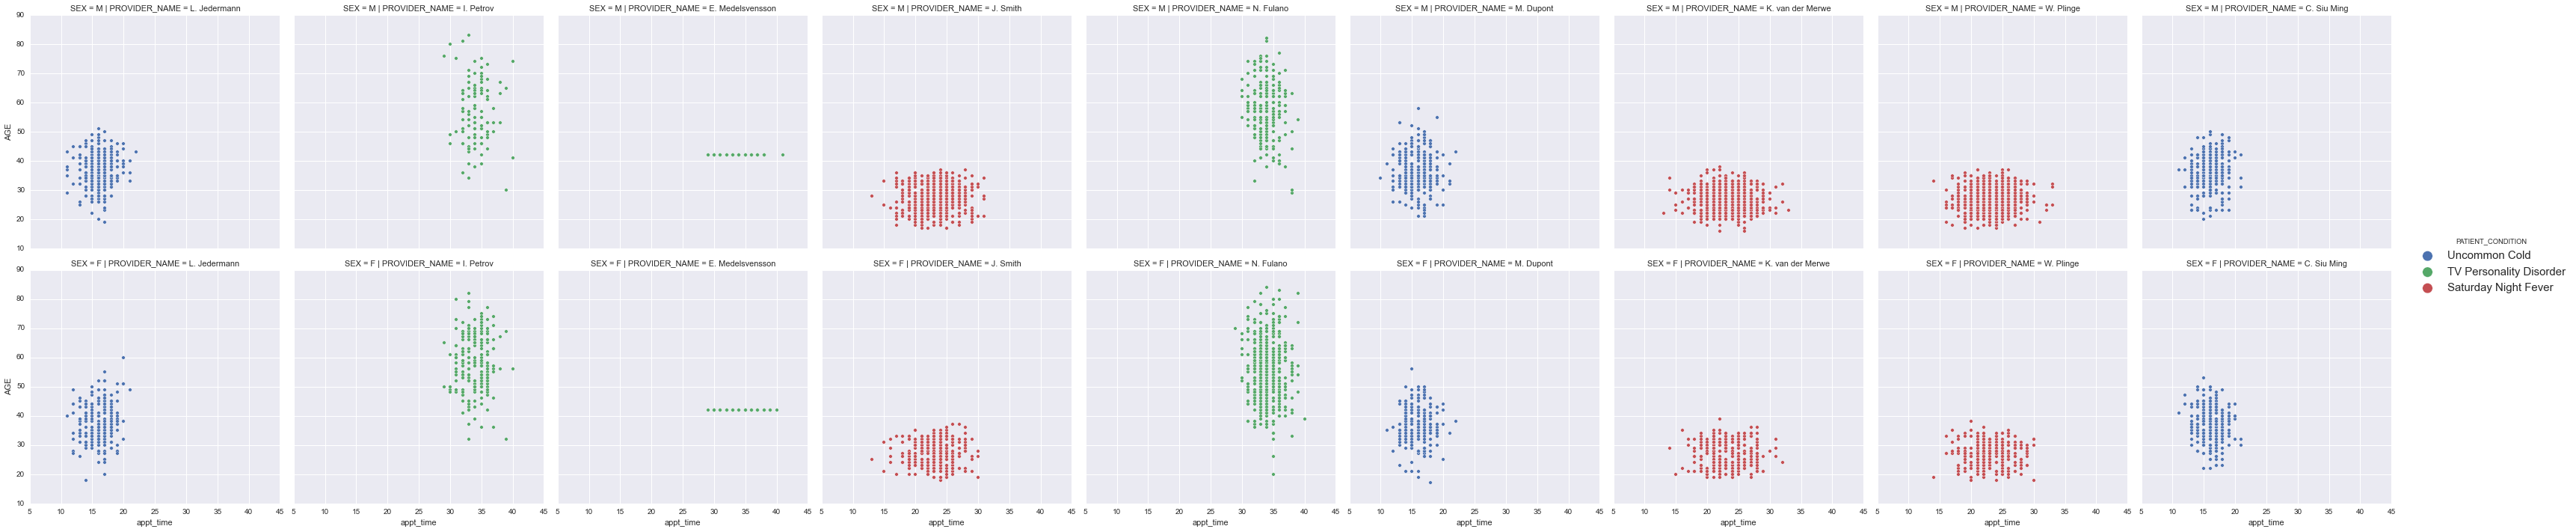

In [226]:
g = sns.FacetGrid(data=df, hue='PATIENT_CONDITION', col='PROVIDER_NAME', row='SEX', size=5, aspect=1)
g = g.map(plt.scatter, 'appt_time', 'AGE', edgecolor='w')
g.add_legend(fontsize=15, markerscale=3)
g.savefig('doctor_sex.png', dpi=300)

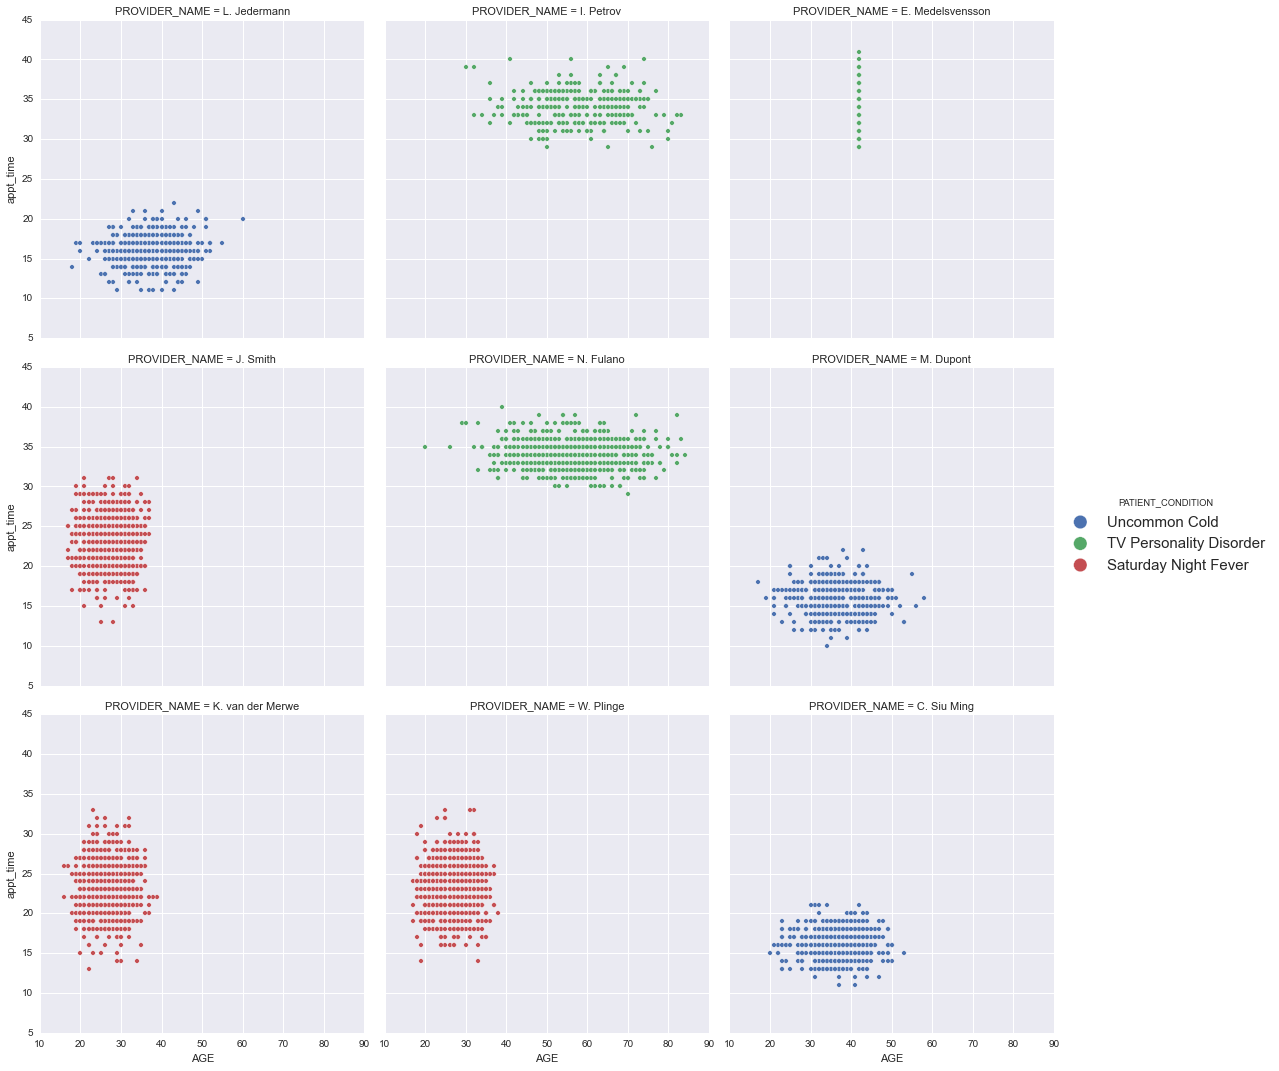

In [6]:
g = sns.FacetGrid(data=df, hue='PATIENT_CONDITION', col='PROVIDER_NAME', size=5, aspect=1, col_wrap=3)
g = g.map(plt.scatter, 'AGE', 'appt_time', edgecolor='w')
g.add_legend(fontsize=15, markerscale=3)
# g.savefig('age_appt_time_by_doctor_by_month.png')

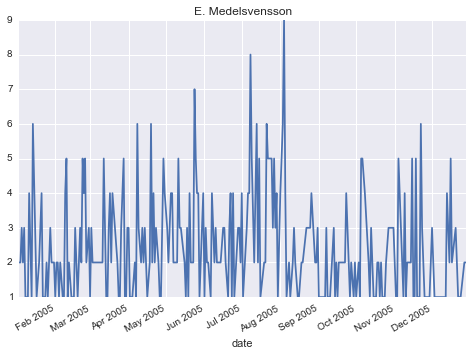

In [86]:
df_date_doctor = df.groupby(['date', 'PROVIDER_NAME'])
df_date_doctor_count = df_date_doctor.count()
for i in set(df.PROVIDER_NAME):
    plt.clf()
    df_date_doctor_count.xs(i, level='PROVIDER_NAME').PATIENT_ID.plot()
    plt.title(i)
    # plt.savefig('doc_appts_{}.png'.format(i), dpi=300)

In [2]:
df_month_cond = df.groupby(['month', 'PATIENT_CONDITION'])
df_month_cond_cnt = df_month_cond.count()
for i in set(df.PATIENT_CONDITION):
    #plt.clf()
    data = df_month_cond_cnt.xs(i, level='PATIENT_CONDITION')
    plt.plot(xrange(1,13), data.PATIENT_ID, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Number of appointments per month by condition')
plt.legend()
plt.savefig('appts_per_month_cond.png', dpi=300)

NameError: name 'df' is not defined

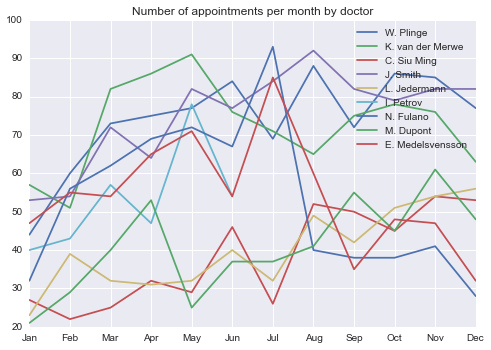

In [77]:
df_month_doc = df.groupby(['month', 'PROVIDER_NAME'])
df_month_doc_cnt = df_month_doc.count()
for i in list(set(df.PROVIDER_NAME)):
    #plt.clf()
    data = df_month_doc_cnt.xs(i, level='PROVIDER_NAME')
    plt.plot(data.index, data.PATIENT_ID, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Number of appointments per month by doctor')
plt.legend()
plt.savefig('appts_per_month_doc.png', dpi=300)

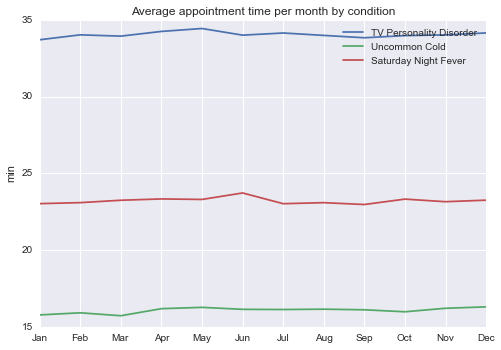

In [213]:
df_month_cond_mean = df_month_cond.mean()
for i in set(df.PATIENT_CONDITION):
    #plt.clf()
    data = df_month_cond_mean.xs(i, level='PATIENT_CONDITION')
    plt.plot(xrange(1,13), data.appt_time, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Average appointment time per month by condition')
plt.ylabel('min')
plt.legend()
# plt.savefig('appt_time_per_month_cond.png', dpi=300)

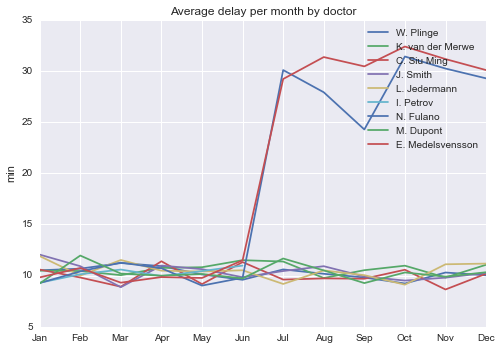

In [123]:
df_month_doc_mean = df_month_doc.mean()
for i in set(df.PROVIDER_NAME):
    #plt.clf()
    data = df_month_doc_mean.xs(i, level='PROVIDER_NAME')
    plt.plot(data.index, data.delay, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Average delay per month by doctor')
plt.ylabel('min')
plt.legend()
plt.savefig('delay_per_month_doc.png', dpi=300)

In [25]:
for i in list(set(df.PROVIDER_NAME)):
    #plt.clf()
    data = df_month_doc_cnt.xs(i, level='PROVIDER_NAME')
    plt.plot(data.index, data.PATIENT_ID, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Number of appointments per month by doctor')
plt.legend()
plt.savefig('appts_per_month_doc.png', dpi=300)

In [88]:
a = df.groupby(['date', 'PROVIDER_NAME']).count()

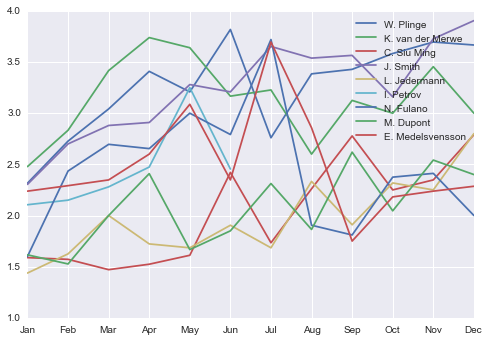

In [124]:
for i in set(df.PROVIDER_NAME):
    b = a.xs(i, level='PROVIDER_NAME')
    c = b.groupby(b.index.month).PATIENT_ID.mean()
    plt.plot(c.index, c, label=i)
plt.xticks(xrange(0, 13), calendar.month_abbr)
plt.xlim(xmin=1)
plt.legend()

In [99]:
for i in list(set(df.PROVIDER_NAME)):
    #plt.clf()
    data = df_month_doc_cnt.xs(i, level='PROVIDER_NAME')
    plt.plot(data.index, data.PATIENT_ID, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)

Index([      (1, u'C. Siu Ming'),  (1, u'E. Medelsvensson'),
               (1, u'I. Petrov'),          (1, u'J. Smith'),
        (1, u'K. van der Merwe'),      (1, u'L. Jedermann'),
               (1, u'M. Dupont'),         (1, u'N. Fulano'),
               (1, u'W. Plinge'),       (2, u'C. Siu Ming'), 
       ...
              (11, u'N. Fulano'),        (11, u'W. Plinge'),
            (12, u'C. Siu Ming'), (12, u'E. Medelsvensson'),
               (12, u'J. Smith'), (12, u'K. van der Merwe'),
           (12, u'L. Jedermann'),        (12, u'M. Dupont'),
              (12, u'N. Fulano'),        (12, u'W. Plinge')],
      dtype='object', length=102)

In [37]:
import calendar
calendar.month_abbr[1]

'Jan'

In [76]:
p = df_date_doctor_count.loc[(slice(None), df.PROVIDER_NAME[0]),:].PATIENT_ID

In [79]:
i = p.index

In [82]:
i.droplevel(1)

Index([u'2005-01-03', u'2005-01-04', u'2005-01-06', u'2005-01-10',
       u'2005-01-11', u'2005-01-17', u'2005-01-18', u'2005-01-19',
       u'2005-01-20', u'2005-01-22', 
       ...
       u'2005-12-20', u'2005-12-21', u'2005-12-22', u'2005-12-23',
       u'2005-12-24', u'2005-12-27', u'2005-12-28', u'2005-12-29',
       u'2005-12-30', u'2005-12-31'],
      dtype='object', name=u'VISIT_DATE', length=242)

In [114]:
for i in set(df.PROVIDER_NAME):
    p2 = df_date_doctor_count.xs(i, level='PROVIDER_NAME').PATIENT_ID
    print '{}\t{:.2f}\t{:.2f}'.format(i[:10], p2.mean(), p2.std())

W. Plinge	3.26	1.71
K. van der	3.14	1.81
C. Siu Min	2.06	1.23
J. Smith	3.24	1.70
L. Jederma	1.99	1.12
I. Petrov	2.47	1.36
N. Fulano	2.50	1.54
M. Dupont	2.10	1.11
E. Medelsv	2.51	1.48


In [205]:
df[(df.PROVIDER_NAME == 'M. Dupont') & (df.date == df.date.iloc[0])]

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,...,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor,schedd,startd,endd,arrived,since_prev_sched
6,4620093,Uncommon Cold,ConglomoHealth,41,F,M. Dupont,2005-01-03,1900-01-01 10:59:00,1900-01-01 10:58:00,1900-01-01 11:15:00,...,1,0,16,6,0,10.983333,10.966667,11.25,10.916667,NaN


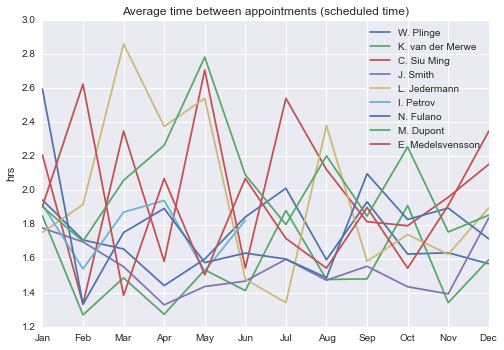

In [257]:
df_month_doc_mean = df.groupby(['month', 'PROVIDER_NAME']).mean()
for i in set(df.PROVIDER_NAME):
    #plt.clf()
    data = df_month_doc_mean.xs(i, level='PROVIDER_NAME')
    plt.plot(data.index, data.since_prev_sched, label=i)
    plt.xticks(xrange(0, 13), calendar.month_abbr)
    plt.xlim(xmin=1)
plt.title('Average time between appointments (scheduled time)')
plt.ylabel('hrs')
plt.legend()
# plt.savefig('delay_per_month_doc.png', dpi=300)

In [232]:
set(df.PATIENT_CONDITION)

{'Saturday Night Fever', 'TV Personality Disorder', 'Uncommon Cold'}

In [267]:
len(df[df.since_prev_sched < 5.0/60])

221

In [269]:
len(df[(df.since_prev_sched < 16.0/60) & (df.cond == 'uc')])

77

In [212]:
df.describe()           

,PATIENT_ID,AGE,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor,schedd,startd,endd,arrived,since_prev_sched
count,5706.000000,5706.000000,5706,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,3422.000000
mean,4595647.020680,36.195408,-1 days +23:59:41.808622,12.315457,24.489485,6.593060,2.551875,20.837364,6.501753,1.170172,11.366252,11.566456,11.974614,11.361199,1.827041
std,14110.576685,12.295180,0 days 00:02:53.153731,9.334341,7.103169,3.311602,1.570161,5.849726,4.642419,1.325524,2.359846,2.365069,2.368982,2.360755,1.508805
min,4571288.000000,16.000000,-1 days +23:56:00,1.000000,10.000000,1.000000,0.000000,6.000000,0.000000,0.000000,7.983333,7.933333,8.200000,7.916667,0.233333
25%,4583474.500000,27.000000,-1 days +23:56:00,5.000000,18.000000,4.000000,1.000000,16.000000,3.000000,0.000000,9.483333,9.700000,10.116667,9.483333,0.750000
50%,4595365.000000,33.000000,0 days 00:00:00,10.000000,23.000000,6.000000,3.000000,21.000000,6.000000,1.000000,10.983333,11.150000,11.550000,10.983333,1.500000
75%,4607981.750000,42.000000,0 days 00:03:00,16.000000,32.000000,9.000000,4.000000,25.000000,10.000000,2.000000,13.000000,13.100000,13.495833,12.933333,2.500000
max,4620193.000000,84.000000,0 days 00:03:00,71.000000,41.000000,12.000000,5.000000,36.000000,22.000000,9.000000,18.483333,18.633333,18.900000,18.416667,10.500000


In [164]:
df.head()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,...,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor,schedd,startd,endd,arrived
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,...,15,1,0,16,0,0,7.983333,8.116667,8.366667,7.916667
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,...,35,1,0,16,1,0,8.250000,8.300000,8.883333,8.250000
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,...,35,1,0,16,2,0,8.500000,8.700000,9.283333,8.433333
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,...,28,1,0,16,3,0,9.000000,9.183333,9.650000,9.050000
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,...,16,1,0,16,4,1,10.000000,10.000000,10.266667,9.933333


In [ ]:
df.groupby()

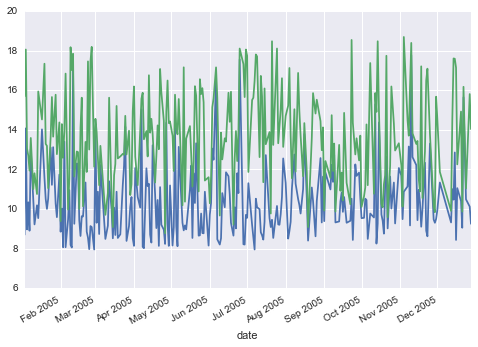

In [136]:
for i in set(df.PROVIDER_NAME):
    plt.clf()
    s = df_date_doctor.start.min().xs(i, level='PROVIDER_NAME').dt
    (s.hour + s.minute/60.0).plot()
    e = df_date_doctor.end.max().xs(i, level='PROVIDER_NAME').dt
    (e.hour + e.minute/60.0).plot()
    plt.savefig('start_end_{}.png'.format(i), dpi=300)

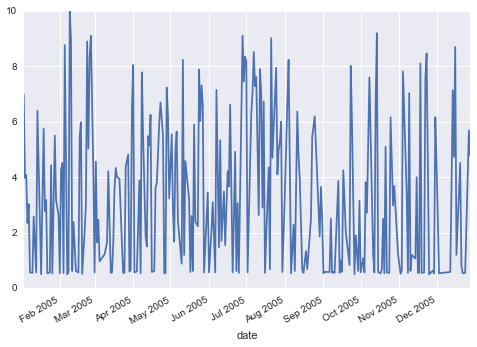

In [137]:
for i in set(df.PROVIDER_NAME):
    plt.clf()
    s = df_date_doctor.start.min().xs(i, level='PROVIDER_NAME').dt
    e = df_date_doctor.end.max().xs(i, level='PROVIDER_NAME').dt
    ((e.hour + e.minute/60.0) - (s.hour + s.minute/60.0)).plot() 
    plt.savefig('length_of_day_{}.png'.format(i), dpi=300)

In [133]:
appt_counts = df.groupby(['date', 'sched', 'PROVIDER_NAME']).count()

In [137]:
appt_counts[appt_counts.PATIENT_ID == 3]

,,,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor
date,sched,PROVIDER_NAME,,,,,,,,,,,,,,,,
2005-02-15,1900-01-01 10:59:00,K. van der Merwe,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2005-03-02,1900-01-01 09:00:00,N. Fulano,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2005-06-01,1900-01-01 12:00:00,W. Plinge,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2005-07-12,1900-01-01 10:00:00,J. Smith,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2005-08-09,1900-01-01 09:00:00,J. Smith,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2005-09-22,1900-01-01 09:00:00,L. Jedermann,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2005-11-10,1900-01-01 10:59:00,W. Plinge,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [214]:
df.columns

Index([u'PATIENT_ID', u'PATIENT_CONDITION', u'INSURANCE_TYPE', u'AGE', u'SEX',
       u'PROVIDER_NAME', u'date', u'sched', u'start', u'end', u'arrive',
       u'lateness', u'delay', u'appt_time', u'month', u'dayofweek',
       u'num_appts', u'appt_pos_overall', u'appt_pos_doctor', u'schedd',
       u'startd', u'endd', u'arrived', u'since_prev_sched'],
      dtype='object')